# Week 12 Lecture - The Central Limit Theorem 

In [14]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [15]:
wheel = Table.read_table('roulette.csv')
wheel

Pocket | Color
0      | green
0      | green
1      | red
2      | black
3      | red
4      | black
5      | red
6      | black
7      | red
8      | black
... (28 rows omitted)

In [16]:
# win when red
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [17]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket | Color | Winnings: Red
0      | green | -1
0      | green | -1
1      | red   | 1
2      | black | -1
3      | red   | 1
4      | black | -1
5      | red   | 1
6      | black | -1
7      | red   | 1
8      | black | -1
... (28 rows omitted)

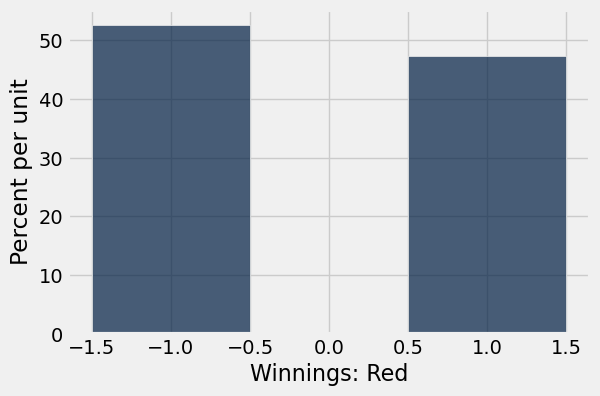

In [18]:
# graph the winnings
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

The code below simulates your net gain if you bet $1 on red on 400 different spins of the roulette wheel.

In [19]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

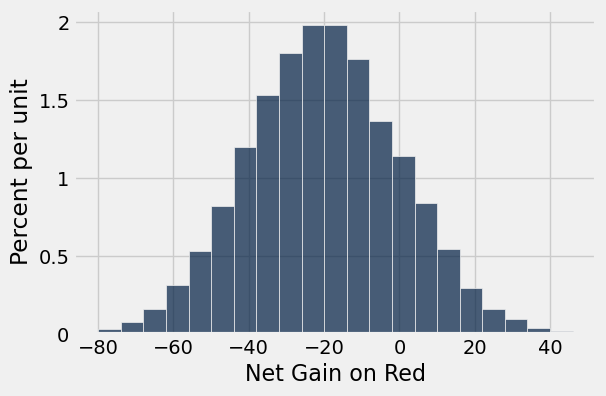

In [20]:
# create histogram
results.hist(bins=np.arange(-80, 50, 6))

In [21]:
# Center of distribution - Average = Mean
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [23]:
# Expected wins in 400 spins
400 * average_per_bet

-21.052631578947366

In [24]:
np.mean(results.column(0))

-21.158799999999999

In [25]:
# Spread of distribution
np.std(results.column(0))

20.105173029844831

# Summary
The net gain in 400 bets is the sum of the 400 amounts won on each individual bet. The probability distribution of that sum is approximately normal, with an average and an SD that we can approximate.

In [26]:
united = Table.read_table('united.csv')
united

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13815 rows omitted)

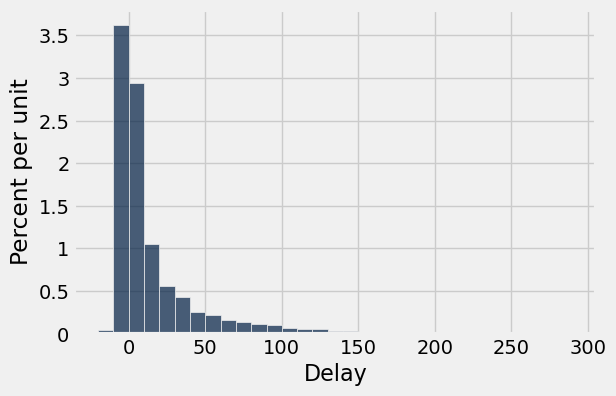

In [27]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [28]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [29]:
delay = united.select('Delay')

In [30]:
np.mean(delay.sample(400).column('Delay'))

18.489999999999998

In [31]:
# 400 samples repeated 10,000 times
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

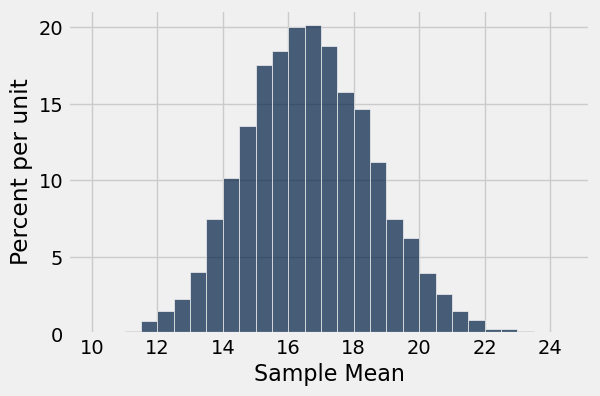

In [32]:
# histograms of results
results.hist(bins=np.arange(10, 25, 0.5))

# Central Limit Theorem
The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.
<br>
The Central Limit Theorem makes it possible to make inferences with very little knowledge about the population, provided we have a large random sample. That is why it is central to the field of statistical inference.

In [17]:
baby = Table.read_table('baby.csv')
baby

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

In [19]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [20]:
sd_height = np.round(np.std(heights),1)
sd_height

2.5

In [21]:
heights.min(), heights.max()

(53, 72)

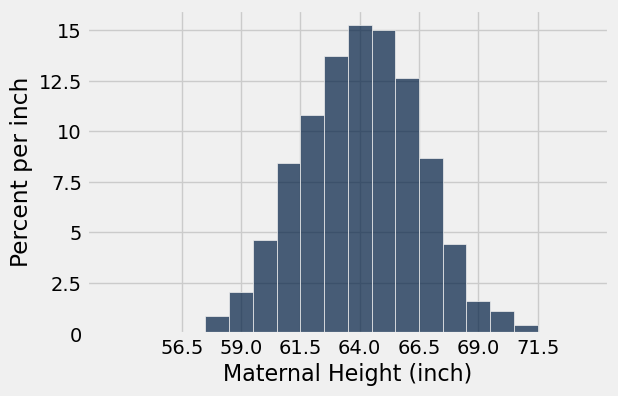

In [24]:
baby.hist('Maternal Height', bins=np.arange(53.5, 73.6, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

# How to spot the SD on a bell shaped curve
To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an “upside-down cup” to a “right-way-up cup”; formally, the curve has a point of inflection. That point is one SD above average. It is the point z = 1, which is “average plus 1 SD” = 66.5 inches.

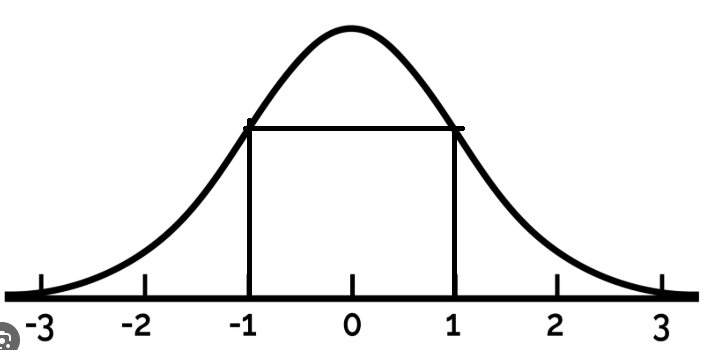


# The Standard Normal Curve
Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1.

-- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

```
from scipy import stats
stats.norm.cdf(z)
```
where z is the number of standard deviations from the mean.


In [7]:
from scipy import stats
stats.norm.cdf(1)

np.float64(0.8413447460685429)

## Area to the left of 1 on the normal curve is 84.13%

In [9]:
1 - stats.norm.cdf(1)

np.float64(0.15865525393145707)

## Area to the right of 1 on the normal curve is 15.87%

In [10]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

np.float64(0.6826894921370859)

## Area between -1 and 1 on the normal curve is 68.27%

In [11]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

np.float64(0.9544997361036416)

## Area between -2 and 2 on the normal curve is 95.45%

In [12]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

np.float64(0.9973002039367398)

## Area between -3 and 3 on the normal curve is 99.73%

# Empirical Rule
When our curve is bell shaped we can use the Empirical Rule which is an approximation of the Normal curve.  Otherwise, use Chebychev;s bounds
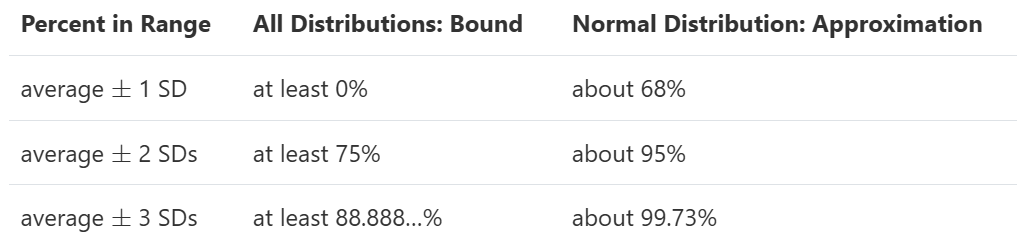

In [ ]:
# 